In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from nilmtk.api import API

In [3]:
from nilmtk.disaggregate import Mean, FHMMExact

In [4]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
    
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner'],
  'display_predictions':False,
  'methods': {
      'FHMMExact':FHMMExact({'num_of_states':2}),
      'Mean': Mean({}),
      
          
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': 'C:/Users/Hp/Desktop/nilmtk-contrib/dataport.hdf5',
				'buildings': {
				54: {
                'start_time': '2015-01-28',
                'end_time': '2015-02-12'
              },
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': 'C:/Users/Hp/Desktop/nilmtk-contrib/dataport.hdf5',
			'buildings': {
                54: {
                'start_time': '2015-02-12',
                'end_time': '2015-02-14'
              },
			}
	}
},
        'metrics':['rmse']
}
}

In [5]:
api_results = API(redd)

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
Generating predictions for : FHMM
Generating predictions for : Mean
............  rmse  ..............
                 FHMMExact        Mean
fridge           65.462272   80.903229
air conditioner  79.267856  112.231550


In [6]:
errors_keys = api_results.errors_keys
errors = api_results.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Datport_54_rmse
                 FHMMExact        Mean
fridge           65.462272   80.903229
air conditioner  79.267856  112.231550





In [7]:
from nilmtk_contrib.disaggregate import DAE

Using TensorFlow backend.


In [14]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
    
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner'],
  'display_predictions':True,
  'methods': {
      'FHMMExact':FHMMExact({'num_of_states':2}),
      'Mean': Mean({}),
      'DAE':DAE({'pretrained-model-path':'buildsys-model-DAE'})
      
          
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': 'C:/Users/Hp/Desktop/nilmtk-contrib/dataport.hdf5',
				'buildings': {
				54: {
                'start_time': '2015-01-28',
                'end_time': '2015-02-12'
              },
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': 'C:/Users/Hp/Desktop/nilmtk-contrib/dataport.hdf5',
			'buildings': {
                54: {
                'start_time': '2015-02-15',
                'end_time': '2015-02-22'
              },
			}
	}
},
        'metrics':['rmse']
}
}

Loading the model using the pretrained-weights


Started training for  DAE
DAE  is loading the pretrained model
Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
Generating predictions for : FHMM
Generating predictions for : Mean
Generating predictions for : DAE


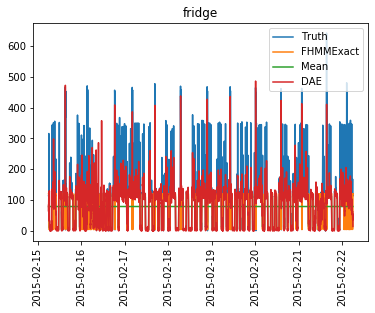

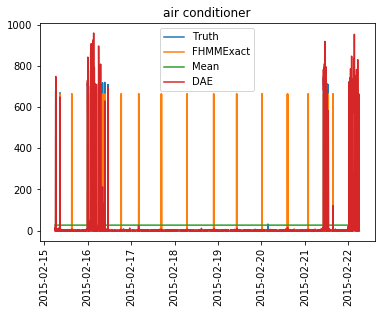

............  rmse  ..............
                 FHMMExact        Mean        DAE
fridge           53.452597   74.713202  39.791136
air conditioner  64.588617  114.389331  32.083536


In [15]:
api_results = API(redd)

In [16]:
errors_keys = api_results.errors_keys
errors = api_results.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Datport_54_rmse
                 FHMMExact        Mean        DAE
fridge           53.452597   74.713202  39.791136
air conditioner  64.588617  114.389331  32.083536



